In [1]:
import osmnx as ox
import folium
import networkx as nx

In [2]:
source_address = "Boulevard du Président Kennedy, Quartier Rachot, Faubourg de la porte d'Havré, Mons, Hainaut, Wallonia, 7000, Belgium"
target_address = "Avenue Léo Collard, Les Grands Prés, Faubourg du Parc, Mons, Hainaut, Wallonia, 7000, Belgium"

pointA = ox.geocode(source_address)
pointB = ox.geocode(target_address)

# pointA = (50.4575, 3.93173)
pointAX = pointA[0]
pointAY = pointA[1]
# pointB = (50.456324, 3.961151)
pointBX = pointB[0]
pointBY = pointB[1]

print(pointA)
print(pointB)

(50.4590713, 3.96051)
(50.4584305, 3.933202)


<class 'networkx.classes.multidigraph.MultiDiGraph'>


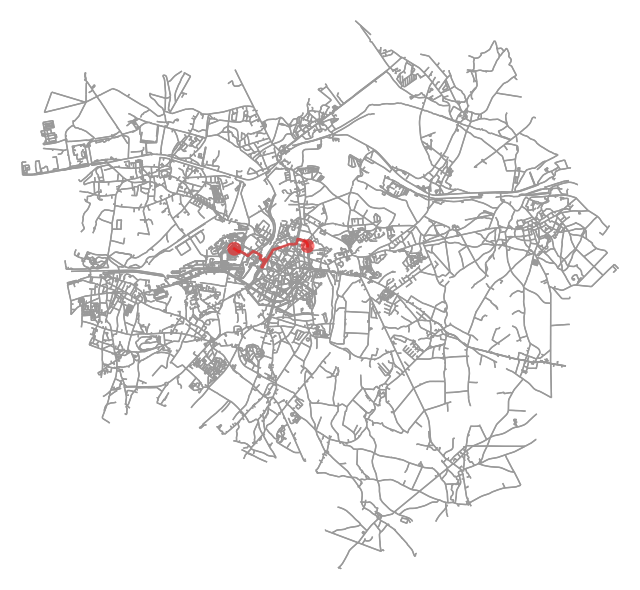

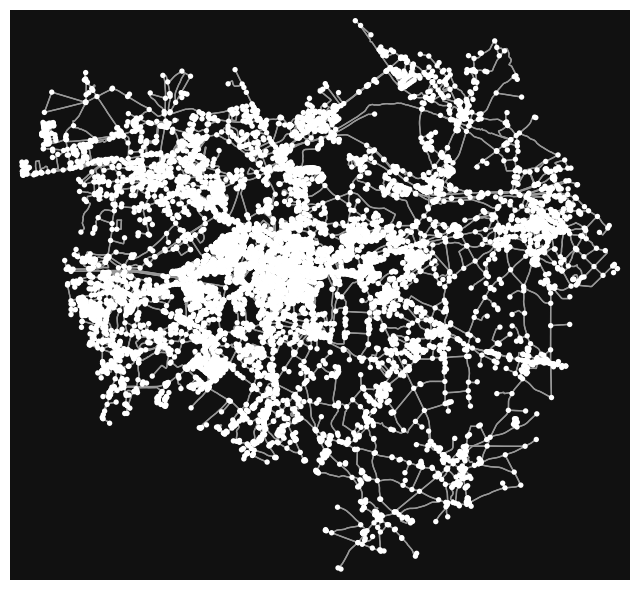

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [15]:
# Step 1: Set up and download the pedestrian network for Mons
mons_location = "Mons, Belgium"

network_type = 'walk'

# Download the walkable (pedestrian) network
G = ox.graph_from_place(mons_location, network_type=network_type)

if network_type == 'drive':
    G = ox.routing.add_edge_speeds(G)
elif network_type == 'walk':
    # Manually set every path to 5 kph (avg walking speed)
    nx.set_edge_attributes(G, values=326, name="speed_kph")

G = ox.routing.add_edge_travel_times(G)

print(type(G))

# Step 2: Convert the graph to edges with coordinates for plotting
# Get the central point of Mons to center the map
mons_center = [50.4542, 3.95]  # Coordinates for Mons center
map_mons = folium.Map(location=mons_center, zoom_start=14)

orig = ox.nearest_nodes(G, pointAY, pointAX)
dest = ox.nearest_nodes(G, pointBY, pointBX)


route = nx.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=2, node_size=0, bgcolor='w')

ox.plot_graph(G)


In [16]:
G.edges[(9094012, 1162044152, 0)]

{'osmid': 33471989,
 'lanes': '4',
 'ref': 'N6',
 'name': 'Rue Grande',
 'highway': 'primary',
 'maxspeed': '70',
 'oneway': False,
 'reversed': True,
 'length': 90.567,
 'geometry': <LINESTRING (3.99 50.501, 3.99 50.501, 3.991 50.501, 3.991 50.501)>,
 'speed_kph': 326,
 'travel_time': 1.0}

In [7]:
route_coords = []
for n in route:
    route_coords.append((G.nodes[n]['y'], G.nodes[n]['x']))


[(50.4590592, 3.9603594), (50.4596795, 3.9602232), (50.4600089, 3.9598325), (50.4604969, 3.9582165), (50.460696, 3.9568322), (50.4607177, 3.9566966), (50.4604723, 3.9566339), (50.4603828, 3.9565996), (50.4601955, 3.9565309), (50.4597322, 3.956362), (50.4596413, 3.9563288), (50.4595847, 3.9559556), (50.459568, 3.9558794), (50.4595004, 3.9554713), (50.459491, 3.9551199), (50.4594933, 3.9544224), (50.4594798, 3.9535133), (50.4593806, 3.953036), (50.4587561, 3.95039), (50.4587263, 3.9502325), (50.458677, 3.9500239), (50.4586298, 3.9498243), (50.4585502, 3.9493792), (50.4584877, 3.9490953), (50.4582447, 3.947986), (50.4582054, 3.947809), (50.4576189, 3.9471169), (50.4561084, 3.9456715), (50.4558149, 3.9453843), (50.4544489, 3.9440216), (50.4541504, 3.9437181), (50.4540578, 3.9436719), (50.4540724, 3.9433787), (50.4541259, 3.9433086), (50.4552907, 3.9441175), (50.4555198, 3.944515), (50.4557506, 3.9445581), (50.4557818, 3.9445053), (50.4558627, 3.9441909), (50.456065, 3.9443042), (50.4557306

In [ ]:
# Step 3: Plot each walkable path on the map
# Iterate over each edge in the graph to get the coordinates of the paths
for u, v, data in G.edges(data=True):
    # Each edge contains a list of points (nodes) making up the path
    if 'geometry' in data:  # if there's a geometry attribute, it's a LineString
        path_coords = [(lat, lon) for lon, lat in data['geometry'].coords]
    else:  # otherwise, it's a straight line from node to node
        point1 = (G.nodes[u]['y'], G.nodes[u]['x'])
        point2 = (G.nodes[v]['y'], G.nodes[v]['x'])
        path_coords = [point1, point2]

    # Add the path to the folium map with a semi-transparent color
    folium.PolyLine(path_coords, color="blue", weight=2, opacity=0.6).add_to(map_mons)
    folium.PolyLine(route_coords, color="red", weight=2, opacity=0.6).add_to(map_mons)

# Step 4: Display the map
map_mons
